# Importo librerias

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as io
from scipy.stats import linregress as lr
import seaborn as sn 
import os 
import pandas as pd

sn.set_style("whitegrid")
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.edgecolor'] = '#505b63'
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['axes.titlesize']=17
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams["legend.title_fontsize"]=15
             

# Acero

### Cálculo de dureza

In [159]:
hv=[259 ,414 ,229]
print(np.mean(hv))
print(np.std(hv))

hv1=[259 ,229]
print(np.mean(hv1))
print(np.std(hv1))

300.6666666666667
81.06924338010207
244.0
15.0


### Diagramas tension deformación ingenieriles

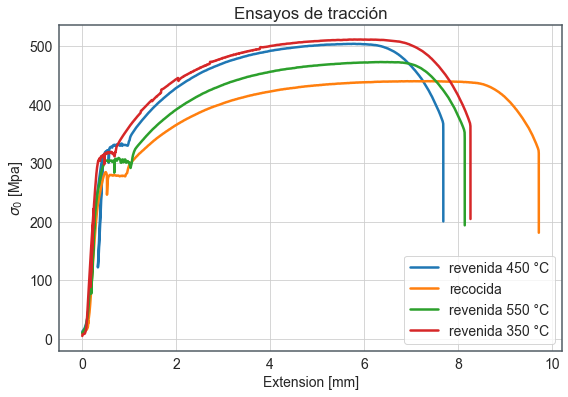

In [10]:
l0=140
d0=4.5 #mm
A=np.pi*0.25*d0**2

fig = plt.figure(figsize=(9,6))
plt.plot(pd.to_numeric(revenida_450["Extension mm"].fillna(0))/l0*100 , pd.to_numeric(revenida_450["Load N"].fillna(0))/A, label='revenida 450 °C')
plt.plot(pd.to_numeric(recocida_200["Extension mm"].fillna(0))/l0*100 , pd.to_numeric(recocida_200["Load N"].fillna(0))/A, label='recocida')
plt.plot(pd.to_numeric(revenida_550["Extension mm"].fillna(0))/l0*100 , pd.to_numeric(revenida_550["Load N"].fillna(0))/A, label='revenida 550 °C')
plt.plot(pd.to_numeric(revenida_350["Extension mm"].fillna(0)).add(7.372390)/l0*100 , pd.to_numeric(revenida_350["Load N"].fillna(0))/A, label='revenida 350 °C')
plt.grid(True)
plt.xlabel("Extension [mm]")
plt.ylabel(r"$\sigma_0$ [Mpa]")
plt.title('Ensayos de tracción')
plt.legend()
plt.savefig("ensayo_traccion.pdf",format="pdf")
plt.show()

# Caracterización de cinta Niquel Titanio

### Estabilización

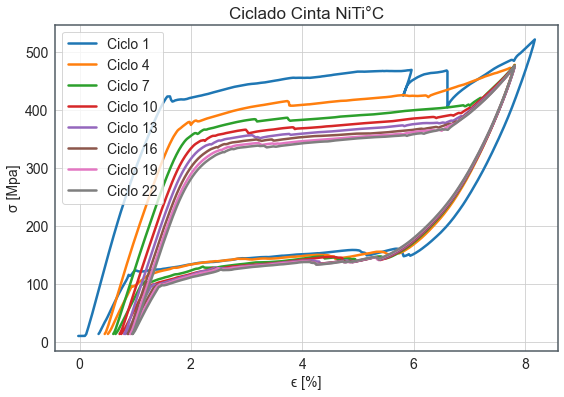

In [150]:
ciclado = pd.read_csv('Materiales_rolo/ciclado_labo2_grupo1_2021.csv',header=0,delimiter=';')

l1=3.25
l2=70.2
t=0.66
A= t*l1
ext= l2
rest = pd.to_numeric(ciclado["Extension mm"][1])
aux_ciclado= ciclado.copy()
aux_ciclado.loc[aux_ciclado['Cycle Count '] == 0, 'Cycle Count '] = 1

fig = plt.figure(figsize=(9,6))
for i in range(1,24,3):
    cicle=aux_ciclado[aux_ciclado["Cycle Count "]==i]
    plt.plot((pd.to_numeric(cicle["Extension mm"].fillna(0))-rest)/ext *100 , pd.to_numeric(cicle["Load N"]/A).fillna(0),label='Ciclo {}'.format(i))

plt.grid(True)
plt.xlabel("ϵ [%]")
plt.ylabel("σ [Mpa]")
plt.title("Ciclado Cinta NiTi°C")
plt.legend()
plt.savefig("ciclado_estabilizacion.pdf", format='pdf')
plt.show()

### Ciclado en función de la temperatura

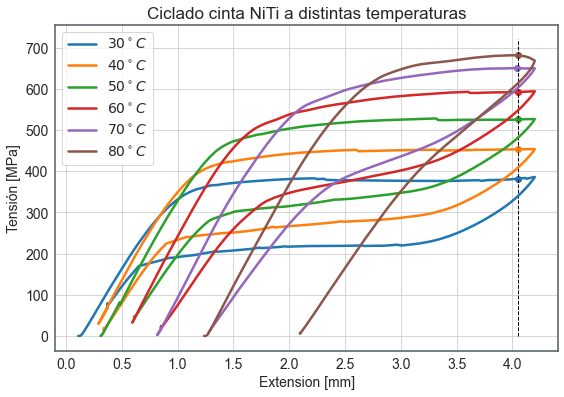

In [2]:
ciclado= pd.read_csv('Materiales_rolo/cinta_temperaturas.csv',header=0,delimiter=';')

t=0.66
l1=3.25
A=t*l1

e_1 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[0:1110]
e_2 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[1100:2110]
e_3 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[2110:3150]
e_4 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[3150:3880]
e_5 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[3880:4290]
e_6 = pd.to_numeric(ciclado["Extension mm"].fillna(0)).to_numpy()[4765:]

s_1 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[0:1110]
s_2 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[1100:2110]
s_3 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[2110:3150]
s_4 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[3150:3880]
s_5 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[3880:4290]
s_6 = pd.to_numeric(ciclado["Load N"]/A).fillna(0).to_numpy()[4765:]

baseline = np.min(np.array([np.min(s_1), np.min(s_2), np.min(s_3), np.min(s_4), np.min(s_5), np.min(s_6)]))

s_1 -= baseline
s_2 -= baseline
s_3 -= baseline
s_4 -= baseline
s_5 -= baseline
s_6 -= baseline

i_1 = np.where(e_1 == np.max(e_1))[0][0]-10
i_2 = np.where(e_2 == np.max(e_2))[0][0]-10
i_3 = np.where(e_3 == np.max(e_3))[0][0]-10
i_4 = np.where(e_4 == np.max(e_4))[0][0]-10
i_5 = np.where(e_5 == np.max(e_5))[0][0]-10
i_6 = np.where(e_6 == np.max(e_6))[0][0]-11

fig = plt.figure(figsize=(9,6))
plt.plot(e_1, s_1, label=r'$30^\circ C$')
plt.scatter(e_1[i_1], s_1[i_1])
plt.plot(e_2, s_2, label=r'$40^\circ C$')
plt.scatter(e_2[i_2], s_2[i_2])
plt.plot(e_3, s_3, label=r'$50^\circ C$')
plt.scatter(e_3[i_3], s_3[i_3])
plt.plot(e_4, s_4, label=r'$60^\circ C$')
plt.scatter(e_4[i_4], s_4[i_4])
plt.plot(e_5, s_5, label=r'$70^\circ C$')
plt.scatter(e_5[i_5], s_5[i_5])
plt.plot(e_6, s_6, label=r'$80^\circ C$')
plt.scatter(e_6[i_6], s_6[i_6])
plt.vlines(4.05, 0, 720, linestyle='dashed', linewidth=1, color='black')
plt.xlabel("Extension [mm]")
plt.ylabel('Tensión [MPa]')
plt.title("Ciclado cinta NiTi a distintas temperaturas")
plt.legend()
plt.savefig("ciclados_temperatura.pdf", format='pdf')
plt.show()

### Clausius-Clapeyron

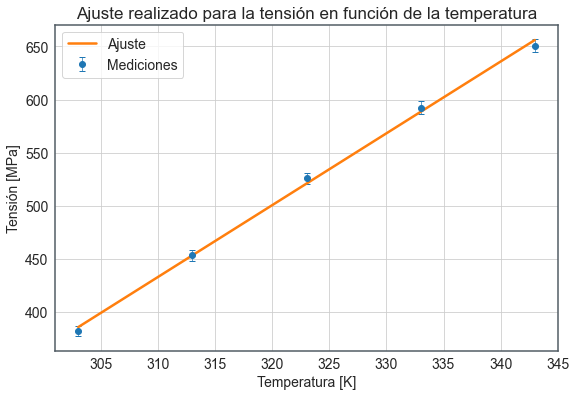

d_sigma/d_T= (6.760631235431236 +- 0.027129326999672732) MPa/K


In [156]:
s_1_c = s_1[i_1]
s_2_c = s_2[i_2]
s_3_c = s_3[i_3]
s_4_c = s_4[i_4]
s_5_c = s_5[i_5]
s_6_c = s_6[i_6]
s_c = np.array([s_1_c, s_2_c, s_3_c, s_4_c, s_5_c])#, s_6_c])

t_1_c = 273+30
t_2_c = 273+40
t_3_c = 273+50
t_4_c = 273+60
t_5_c = 273+70
t_6_c = 273+80
t_c = np.array([t_1_c, t_2_c, t_3_c, t_4_c, t_5_c])#, t_6_c])

p, cov = np.polyfit(t_c-np.mean(t_c), s_c-np.mean(s_c), deg=1, cov=True)
#cov = np.sqrt(cov)
error = cov[0,0]*(t_c-np.mean(t_c))+cov[1,1]

plt.figure(figsize=(9,6))
plt.errorbar(t_c, s_c, error, elinewidth=0.7, capsize=3, label='Mediciones', fmt='o')
plt.plot(t_c, np.polyval(p, t_c-np.mean(t_c))+np.mean(s_c), label='Ajuste')
plt.title('Ajuste realizado para la tensión en función de la temperatura')
plt.xlabel('Temperatura [K]')
plt.ylabel('Tensión [MPa]')
plt.legend()
plt.savefig('clausius_clapeyron.pdf', format='pdf')
plt.show()

print('d_sigma/d_T= ({} +- {}) MPa/K'.format(p[0], cov[0,0]))

# Cobre Aluminio Berilio 

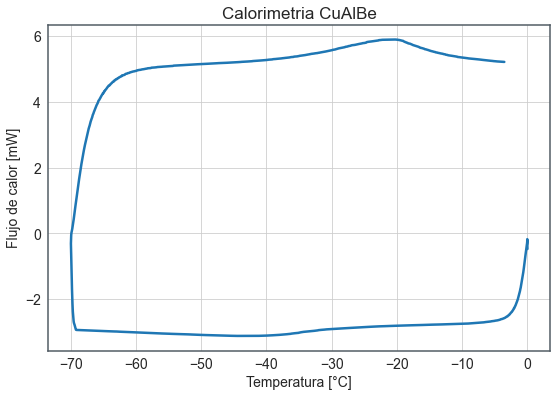

In [106]:
calorimetria = pd.read_csv('Materiales_rolo/CuAlBe 2.csv', delimiter=' ')

tiempo = pd.to_numeric(calorimetria["1"].fillna(0))*60
Temp = pd.to_numeric(calorimetria["2"].fillna(0))
Qlor = pd.to_numeric(calorimetria["3"].fillna(0))

fig = plt.figure(figsize=(9,6))
plt.plot(Temp, Qlor,label='CuAlBe DSC')
#plt.plot(pd.to_numeric(calorimetria["3"].fillna(0)) , pd.to_numeric(calorimetria["4"].fillna(0)))
plt.grid(True)
plt.xlabel("Temperatura [°C]")
plt.ylabel("Flujo de calor [mW]")
plt.title("Calorimetria CuAlBe")
plt.savefig("calorimetria_cualbe.pdf",format="pdf")
plt.show()

### Temperatura de comienzo de transformación y de pico de flujo de calor

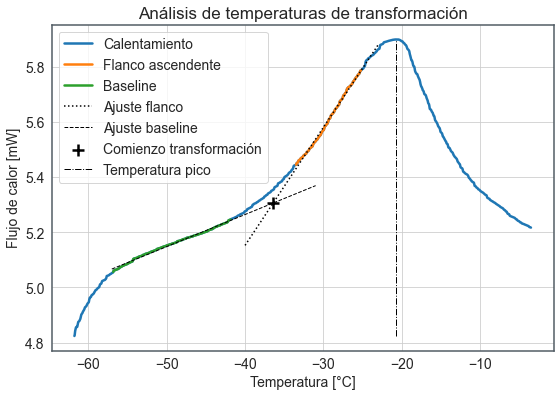

In [144]:
x_lineal = Temp[5250:5700]
y_lineal = Qlor[5250:5700]

p_lineal, cov_lineal = np.polyfit(x_lineal, y_lineal, 1, cov=True)
cov_lineal = np.sqrt(cov_lineal)

x_rampa = Temp[5950:6200]
y_rampa = Qlor[5950:6200]

p_rampa, cov_rampa = np.polyfit(x_rampa, y_rampa, 1, cov=True)
cov_rampa = np.sqrt(cov_rampa)

x_aux_lineal = np.linspace(-57, -31, 100)
x_aux_rampa = np.linspace(-40, -23, 100)

fig = plt.figure(figsize=(9,6))
plt.plot(Temp[5100:], Qlor[5100:], label='Calentamiento')
plt.plot(x_rampa, y_rampa, label='Flanco ascendente')
plt.plot(x_lineal, y_lineal, label='Baseline')
plt.plot(x_aux_rampa, p_rampa[0]*x_aux_rampa+p_rampa[1], color='black', linestyle='dotted', linewidth=1.5, label='Ajuste flanco')
plt.plot(x_aux_lineal, p_lineal[0]*x_aux_lineal+p_lineal[1], color='black', linestyle='dashed', linewidth=1, label='Ajuste baseline')
x_comienzo = (p_lineal[1]-p_rampa[1])/(p_rampa[0]-p_lineal[0])
plt.scatter(x_comienzo, p_rampa[0]*x_comienzo+p_rampa[1], label='Comienzo transformación', color='black', marker='+', s=150)
plt.vlines(Temp[np.argmax(Qlor)], np.min(Qlor[5100:]), np.max(Qlor[5100:]), linestyle='dashdot', color='black', linewidth=1, label='Temperatura pico')
plt.xlabel("Temperatura [°C]")
plt.ylabel("Flujo de calor [mW]")
plt.title("Análisis de temperaturas de transformación")
plt.savefig("calorimetria_temperaturas.pdf",format="pdf")
plt.legend()
plt.show()

In [135]:
print('Tempratura comienzo transición: ', x_comienzo+273)
print('Temperatura pico: ', Temp[np.argmax(Qlor)]+273)

Tempratura comienzo transición:  236.58496134657952
Temperatura pico:  252.20648


### Calor latente de transformación

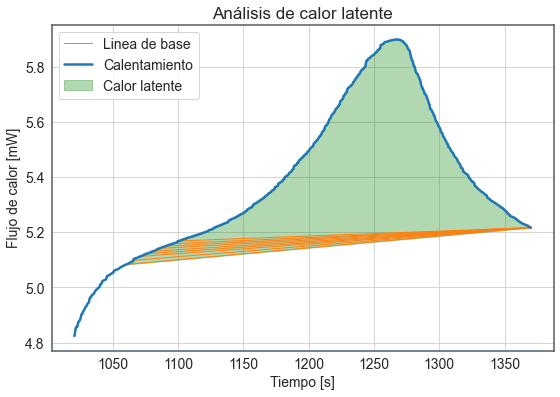

In [146]:
from scipy import integrate
area_trapz = []
area_simps = []
fig = plt.figure(figsize=(9,6))
for point in [5300, 5325, 5350, 5375, 5400, 5425, 5450, 5475, 5500]: 
    x_bl = np.array([tiempo[point], tiempo[len(Temp)-1]])
    y_bl = np.array([Qlor[point], Qlor[len(Temp)-1]])
    m_bl = (y_bl[1]-y_bl[0])/(x_bl[1]-x_bl[0])
    b_bl = y_bl[0]-m_bl*x_bl[0]
    x_bl = np.linspace(tiempo[point], tiempo[len(Temp)-1], len(tiempo)-point)
    y_bl = m_bl*x_bl+b_bl
    dif = Qlor[point:] - y_bl
    area_trapz.append(np.trapz(dif, x_bl))
    area_simps.append(integrate.simpson(dif, x_bl))
    if point==5300:
        plt.fill_between(x_bl, y_bl, Qlor[5300:], color='green', alpha=0.3, label='Calor latente')
        plt.plot(x_bl, y_bl, color='C1', linewidth=1, label='Linea de base')
    else:
        plt.plot(x_bl, y_bl, color='C1', linewidth=1)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Flujo de calor [mW]")
    plt.title("Análisis de calor latente")
plt.plot(tiempo[5100:], Qlor[5100:], label='Calentamiento')
plt.legend()
plt.savefig("calorimetria_calor_latente.pdf",format="pdf")
plt.show()

In [155]:
print('Area según simpson = ({} +- {})J'.format(np.mean(area_simps), np.std(area_simps)))
print('Area según trapecios = ({} +- {})J'.format(np.mean(area_trapz), np.std(area_trapz)))

m = 56/1000**2 #Kg
dm = 0.01/1000**2 #Kg
L = 81/1000 #J
dL = 3/1000 #J
l = L/m
dl = l*np.sqrt((dL/L)**2+(dm/m)**2)
print('Calor latente de transformación=({} +- {})J/Kg'.format(l, dl))

Area según simpson = (81.02391669983257 +- 3.32418733316226)J
Area según trapecios = (81.02373399993927 +- 3.3241722906236)J
Calor latente de transformación=(1446.4285714285716 +- 53.57205123317076)J/Kg
